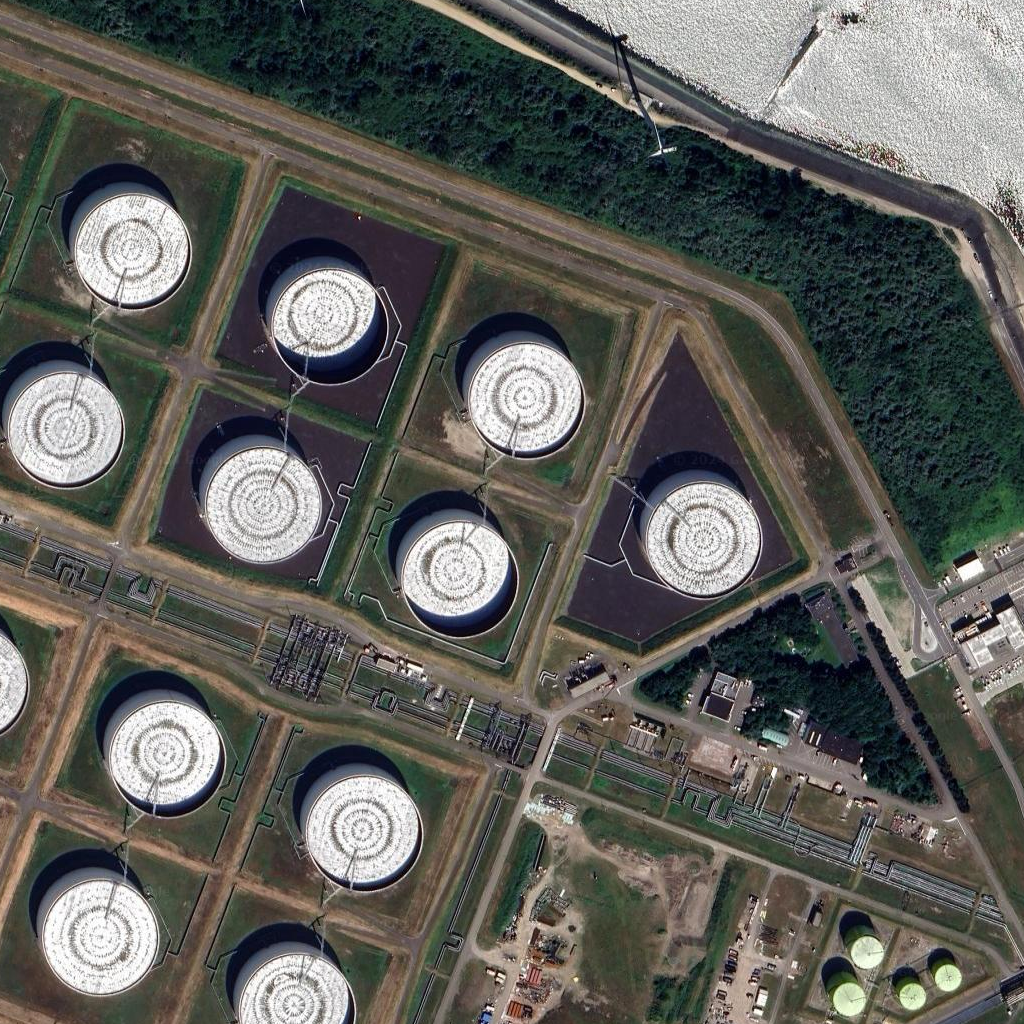

In [12]:
from location import Location
port_location = Location(name='Tweede Maasvlakte, Netherlands', tiles=None, examples=[(1, 5), (2, 6), (4, 10)], meters_per_pixel=0.5)
port_location.load()
port_location.tiles[port_location.examples[0]]

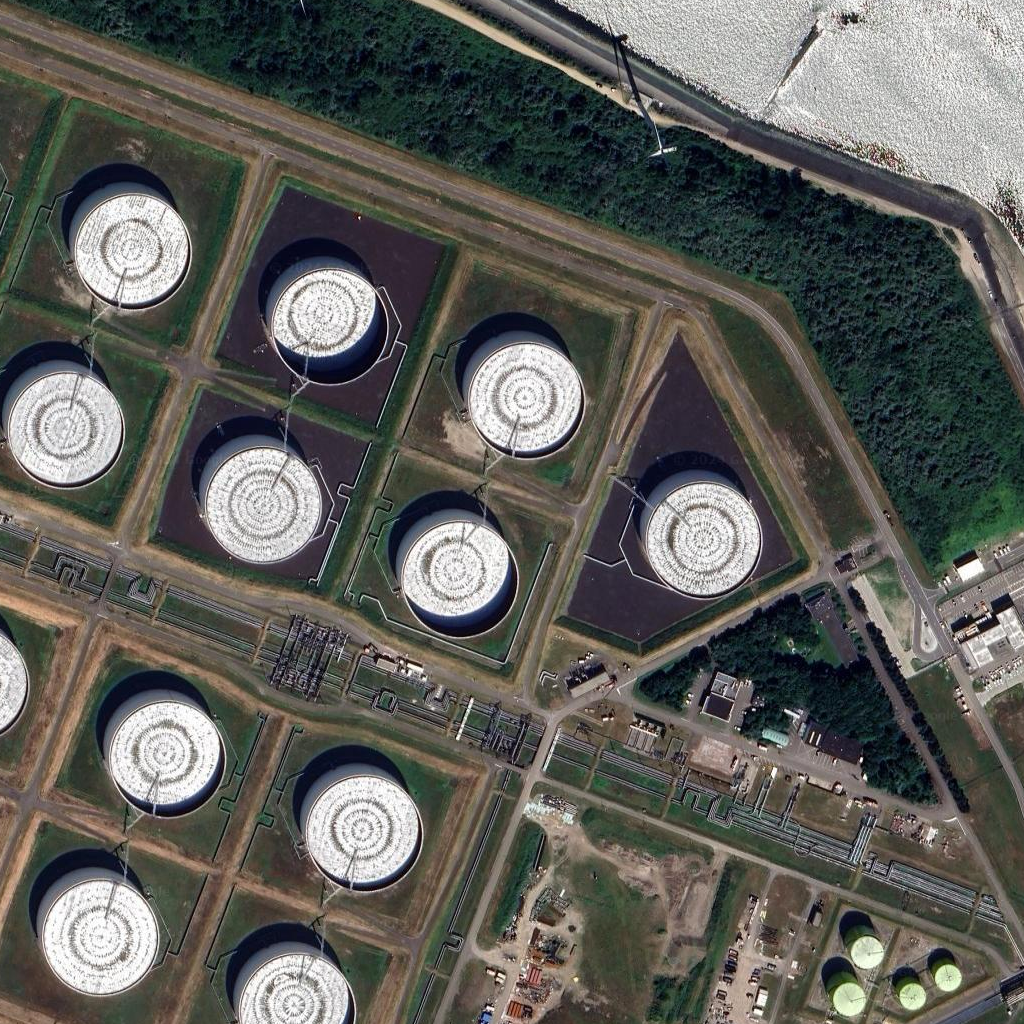

In [2]:
port_location.tiles[(1, 5)]

In [3]:
from PIL import Image
import io
import base64

def pil_to_base64(image, format="PNG"):
    """
    Convert a PIL image to a Base64-encoded string.

    Args:
        image (PIL.Image.Image): The PIL image to convert.
        format (str): The format to save the image (e.g., "PNG", "JPEG").

    Returns:
        str: Base64-encoded image string.
    """
    # Create a bytes buffer
    buffer = io.BytesIO()
    
    # Save the image to the buffer in the specified format
    image.save(buffer, format=format)
    
    # Get the byte data from the buffer
    buffer.seek(0)
    image_bytes = buffer.read()
    
    # Encode the byte data to Base64
    base64_image = base64.b64encode(image_bytes).decode("utf-8")
    
    return base64_image


In [4]:

css_style = """
.container {
    display: flex;
    flex-direction: column;
    align-items: center;
    margin: 20px auto;
}
.row {
    display: flex;
    flex-direction: row;
    align-items: center;
    width: 80%;
    margin-bottom: 10px;
    border: 1px solid #ccc;
    padding: 10px;
    border-radius: 5px;
    box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.1);
}
.index {
    flex: 1;
    text-align: center;
    font-weight: bold;
    color: #333;
}
.image {
    flex: 3;
    text-align: center;
}
img {
    max-width: 100%;
    height: auto;
    border-radius: 5px;
}
"""

In [6]:
from bot.rschatgpt import RSChatGPT


bot = RSChatGPT(gpt_name="gpt-4o-2024-11-20")
def process_individual(prompt, image, threshold=.5):

    # Save the image to a temporary file
    bot.initialize(prompt)



    result_list, image_out = bot.segment_image(image, threshold)

    response = bot.run_text(prompt, result_list)
    return response, image, image_out


Ultralytics 8.3.39 🚀 Python-3.11.10 torch-2.5.1+cu124 CPU (AMD Ryzen 5 Pro 7535U with Radeon Graphics)
Setup complete ✅ (12 CPUs, 30.1 GB RAM, 51.8/68.4 GB disk)


In [7]:
from time import sleep
ex_prompt1 = "Count ships!"
ex_prompt2 = "Count ships! Show how you did it."

def process_individually(prompt: str, images: list[Image.Image], pixels_per_meter:float, threshold:float = .5) -> list:
    return [process_individual(prompt, image) for image in images]

def process_examples(prompt, location):
    example_images = [location.tiles[example] for example in location.examples]
    return process_individually(prompt, example_images, port_location.meters_per_pixel)
process_examples(ex_prompt1, port_location)


0: 1024x1024 3608.3ms
Speed: 9.6ms preprocess, 3608.3ms inference, 3.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 3507.6ms
Speed: 4.8ms preprocess, 3507.6ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 3516.3ms
Speed: 4.9ms preprocess, 3516.3ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


[('0',
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
  <PIL.Image.Image image mode=RGB size=1024x1024>),
 ('2',
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
  <PIL.Image.Image image mode=RGB size=1024x1024>),
 ('1',
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
  <PIL.Image.Image image mode=RGB size=1024x1024>)]

In [ ]:

import os
from pathlib import Path
%load_ext autoreload
%autoreload 2
import base64
import gradio as gr

# Specify your folder containing the images
image_folder = "img/"

locations_dict = {
    "Netherlands port": port_location,
    "New York ": None,
    "Sahara": None,
}


# Load image file paths
image_paths = sorted(Path(image_folder).glob("*.png")) + sorted(Path(image_folder).glob("*.jpg"))
image_data = [(index, str(path)) for index, path in enumerate(image_paths)]

# CSS to style the layout

# Function to generate HTML content for images


css_style = """
.row_s {
    display: flex;
    flex-direction: row;
    align-items: center;
    width: 100%;
    margin-bottom: 30px;
    gap: 20px;
    justify-content: space-between; /* Adjust spacing behavior */
}
.index {
    flex: 1;
    text-align: center;
    font-weight: bold;
    color: #333;
    font-size: 1.5em;
}
.image {
    width: 25%; /* Scale down the image to 50% of its original size */
    height: auto; /* Maintain the aspect ratio */
    max-width: 100%; /* Ensure the image doesn't exceed the container's width */
    display: block; /* Center-align image inside a parent element if needed */
}
"""


# Create the Gradio app
with gr.Blocks(css=css_style) as demo:
    with gr.Row():
        with gr.Column(scale=2):
            with gr.Row():
                # gr.Button("Create a new location")
                # TODO Preselect port Amsterdam
                location_selection = gr.Dropdown(
                    value=None,
                    choices=list(locations_dict.keys()),
                    label="Recent Locations",
                    interactive=True
                    
                )
                prompt_input = gr.Text('', label="Prompt")

            image_display = gr.Image(label="Selected Image", interactive=False, width=300, height=300)



            # Add an empty HTML element
            annotate_examples_btn = gr.Button("Annotate Examples", interactive=False)
            output = gr.HTML(value="<div></div>")

            

            # Add a button to load images
            

            # Update the HTML content when the button is pressed

            submit_all_button = gr.Button("Run", visible=False)
        with gr.Column():
            chat_history = [
                {"role": "user", "content": "Hello!"},
                {"role": "assistant", "content": "Hi there! How can I assist you today?"},
            ]
            def get_chat_history():
                return chat_history
            # Gradio Blocks Interface
            chatbot = gr.Chatbot(type="messages", value=get_chat_history())  # Load initial chat history


            # Function to refresh chat: clear history and reload with updated messages

            # Refresh Button
            #refresh_button = gr.Button("Refresh Chat")
            # refresh_button.click(add_to_chat, inputs=[], outputs=chatbot)


    ### Events
    def add_to_chat(role, message):
        global chat_history
        chat_history.append({"role": role, "content": message})

        return gr.update(value=chat_history)  # Update the chatbot with the new history


    def fetch_examples(prompt_input: str, location_name: str):
        location = locations_dict[location_name]
        api_response = process_examples(prompt_input, location)
        
        assert len(api_response[0]) == 3

        html_content = '<div class="container">'
        for answer, example_image, annotated_image in api_response:
                #with open(image_path, "rb") as img_file:
                #    base64_image = base64.b64encode(img_file.read()).decode("utf-8")
            base64_image = pil_to_base64(example_image)    
            html_content += f"""
            <div class="row_s">
                <div class="image"><img src="data:image/png;base64,{base64_image}"></div>
                {
                    "" if annotated_image is None else f'<div class="image"><img src="data:image/png;base64,{pil_to_base64(annotated_image)}"></div>'
                }

                <div class="index">{answer}</div>
            </div>
            """

        html_content += "</div>"
        return html_content, gr.Button(f"Run query on all {len(location.tiles)} tiles", visible=True)
    # submit_button.click(fetch_examples, inputs=[prompt_input, location_selection], outputs=output)
    annotate_examples_btn.click(fetch_examples, inputs=[prompt_input, location_selection], outputs=[output, submit_all_button])


    def show_button():
        return gr.HTML('')
    submit_all_button.click(show_button, inputs=[], outputs=[output])

    def submit_all(prompt_input: str, location_name: str):
        location = locations_dict[location_name]

        vals = [process_individual(prompt_input, tile) for tile in location.tiles.values()]

        return add_to_chat("assistant", f"At location {location_name}, I see {sum(vals)} in total.")
    submit_all_button.click(submit_all, inputs=[prompt_input, location_selection], outputs=[chatbot])
    def hide_submit_all_button():
        return gr.Button("", visible=False)
    submit_all_button.click(hide_submit_all_button, inputs=[], outputs=[submit_all_button])

    def on_location_selected(location_name: str, prompt):
        location = locations_dict[location_name]
        should_be_interactive = prompt != ""
        return location.get_thumbnail(), gr.Button("Annotate Examples", interactive=should_be_interactive)
    location_selection.change(on_location_selected, inputs=[location_selection, prompt_input], outputs=[image_display, annotate_examples_btn])

    
# Run the app
demo.launch()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.



0: 1024x1024 2569.4ms
Speed: 5.1ms preprocess, 2569.4ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 2623.1ms
Speed: 3.8ms preprocess, 2623.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 2665.8ms
Speed: 3.1ms preprocess, 2665.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)
